<a href="https://colab.research.google.com/github/vcngeno/Group_Work_Homework_2/blob/main/ANALYTICS_PROGRAMMING_HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries & loading data

In [28]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the header file (assuming it's a CSV with one row)
df_header = '/content/headers.txt'
headers = pd.read_csv(df_header, header=None).iloc[0].tolist()

In [3]:
# Read the data file (assuming it's a CSV without headers)
df_data = '/content/rawdata.csv'
data = pd.read_csv(df_data, header=None, sep = '\t', on_bad_lines='skip')

<ipython-input-3-3b816f161f43>:3: DtypeWarning: Columns (1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(df_data, header=None, sep = '\t', on_bad_lines='skip')


In [4]:
print(data)

                           0         1         2     3        4  \
0        2013-01-02 09:45:00  20130102   94500.0     A   41.655   
1        2013-01-02 09:45:00  20130102   94500.0    AA    8.855   
2        2013-01-02 09:45:00  20130102   94500.0   AAN    28.64   
3        2013-01-02 09:45:00  20130102   94500.0   AAP    72.99   
4        2013-01-02 09:45:00  20130102   94500.0  AAPL  551.595   
...                      ...       ...       ...   ...      ...   
9767807  2013-02-25 13:43:00  20130225  134300.0   ACT   84.075   
9767808  2013-02-25 13:43:00  20130225  134300.0  ACTG    30.31   
9767809  2013-02-25 13:43:00  20130225  134300.0  ADBE   38.705   
9767810  2013-02-25 13:43:00  20130225  134300.0   ADI   45.445   
9767811  2013-02-25 13:43:00  20130225  134300.0   ADM   32.025   

                                          5                                 6  \
0                 IndustrySector_Industrial         IndustryGroup_Electronics   
1             IndustrySector_Basi

In [5]:
data.columns = headers

In [6]:
# Now the 'data' DataFrame has both the data and the correct headers
print(data.head())

              datetime      Date     time ticker      mid  \
0  2013-01-02 09:45:00  20130102  94500.0      A   41.655   
1  2013-01-02 09:45:00  20130102  94500.0     AA    8.855   
2  2013-01-02 09:45:00  20130102  94500.0    AAN    28.64   
3  2013-01-02 09:45:00  20130102  94500.0    AAP    72.99   
4  2013-01-02 09:45:00  20130102  94500.0   AAPL  551.595   

                               sector                     industrygroup  \
0           IndustrySector_Industrial         IndustryGroup_Electronics   
1       IndustrySector_BasicMaterials              IndustryGroup_Mining   
2  IndustrySector_ConsumerNonCyclical  IndustryGroup_CommercialServices   
3     IndustrySector_ConsumerCyclical              IndustryGroup_Retail   
4           IndustrySector_Technology           IndustryGroup_Computers   

      alpha1    alpha2  
0  10.803500  0.075531  
1   2.273380  0.000000  
2  -6.308750  4.000000  
3   0.000000  0.000000  
4  -0.864097 -0.007636  


#Data Cleaning

In [7]:
#Remove missing data points in ticker column
df_final = data.dropna(subset=['ticker'])

In [8]:
#Cleaned dataframe
print(df_final)

                    datetime      Date      time ticker      mid  \
0        2013-01-02 09:45:00  20130102   94500.0      A   41.655   
1        2013-01-02 09:45:00  20130102   94500.0     AA    8.855   
2        2013-01-02 09:45:00  20130102   94500.0    AAN    28.64   
3        2013-01-02 09:45:00  20130102   94500.0    AAP    72.99   
4        2013-01-02 09:45:00  20130102   94500.0   AAPL  551.595   
...                      ...       ...       ...    ...      ...   
9767807  2013-02-25 13:43:00  20130225  134300.0    ACT   84.075   
9767808  2013-02-25 13:43:00  20130225  134300.0   ACTG    30.31   
9767809  2013-02-25 13:43:00  20130225  134300.0   ADBE   38.705   
9767810  2013-02-25 13:43:00  20130225  134300.0    ADI   45.445   
9767811  2013-02-25 13:43:00  20130225  134300.0    ADM   32.025   

                                     sector                     industrygroup  \
0                 IndustrySector_Industrial         IndustryGroup_Electronics   
1             Industr

In [26]:
#Find the best-performing (return) sector
best_perf = df_final.loc[df_final['alpha1'] > 0, ['sector','alpha1']]
df_final2 = best_perf.sort_values('alpha1', ascending=False)
df_best_sector = df_final2.head(1)
print(df_best_sector)

                                    sector   alpha1
529507  IndustrySector_ConsumerNonCyclical  185.702


#Data Visualization

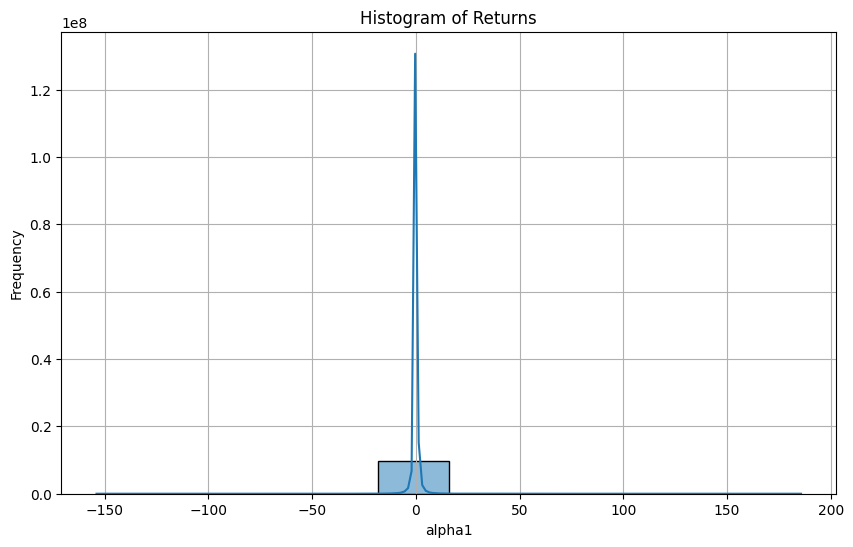

In [31]:
# Plotting histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_final['alpha1'], bins=10, kde=True)
plt.title('Histogram of Returns')
plt.xlabel('alpha1')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()